In [1]:
# 1. Read the csv file and load it into a pandas dataframe.

# Importing the libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the Cab data 
df_cab = pd.read_csv('/Users/viedamayanti/Desktop/Data-Glacier-Data-Analyst-Intern/week2/DataSets-main/Cab_Data.csv', low_memory=False)
df_city = pd.read_csv('/Users/viedamayanti/Desktop/Data-Glacier-Data-Analyst-Intern/week2/DataSets-main/City.csv', low_memory=False)
df_customer_ID = pd.read_csv('/Users/viedamayanti/Desktop/Data-Glacier-Data-Analyst-Intern/week2/DataSets-main/Customer_ID.csv', low_memory=False)
df_transaction_ID = pd.read_csv('/Users/viedamayanti/Desktop/Data-Glacier-Data-Analyst-Intern/week2/DataSets-main/Transaction_ID.csv', low_memory=False)

In [3]:
# Check null values
def check_null(df):
    return df.isnull().sum()

In [4]:
# Replacing white space with underscore for all columns
data_frames = [df_cab, df_city, df_customer_ID, df_transaction_ID]
for df in data_frames:
    df.columns = [col.replace(' ', '_') for col in df.columns]
    print(check_null(df))
    print(df.columns)
    print(df.dtypes)
    print(df.info)
    print(df.dtypes)

Transaction_ID    0
Date_of_Travel    0
Company           0
City              0
KM_Travelled      0
Price_Charged     0
Cost_of_Trip      0
dtype: int64
Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')
Transaction_ID      int64
Date_of_Travel      int64
Company            object
City               object
KM_Travelled      float64
Price_Charged     float64
Cost_of_Trip      float64
dtype: object
<bound method DataFrame.info of         Transaction_ID  Date_of_Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10000012           42375    Pink Cab     ATLANTA GA   
2             10000013           42371    Pink Cab     ATLANTA GA   
3             10000014           42376    Pink Cab     ATLANTA GA   
4             10000015           42372    Pink Cab     ATLANTA GA   
...                ...             ...         ...            ..

In [5]:
# Reformat the date column 
df_cab['Date_of_Travel'] = pd.to_datetime(df_cab['Date_of_Travel'], origin='1899-12-30', unit='D')

In [6]:
df_city.head(2)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"


In [7]:
# Change the type of the column from object to float 
df_city.dtypes

City          object
Population    object
Users         object
dtype: object

In [8]:
# Replace comma 
def remove_comma(value):
    return float(value.replace(",",""))

In [9]:
df_city['Population'] = df_city['Population'].apply(remove_comma)

In [10]:
df_city['Users'] = df_city['Users'].apply(remove_comma)

In [11]:
df_city.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [12]:
# Check the duplicate value
df.duplicated().sum()

0

In [13]:
# Check the rows and the columns every data
print(df_cab.shape)
print(df_city.shape)
print(df_customer_ID.shape)
print(df_transaction_ID.shape)


(359392, 7)
(20, 3)
(49171, 4)
(440098, 3)


In [14]:
# Merged all the data 
merged_all_data = df_cab.merge(df_transaction_ID, on='Transaction_ID').merge(df_customer_ID, on='Customer_ID').merge(df_city, on='City')

In [15]:
merged_all_data.shape

(359392, 14)

In [16]:
# 1. Customer Behavior Analysis:
# Frequency of Cab Usage: Understand how often customers use cab services.
transaction_count_by_customer = merged_all_data.groupby('Customer_ID')['Transaction_ID'].count()
transaction_count_by_customer.describe()

count    46148.000000
mean         7.787813
std          9.208328
min          1.000000
25%          2.000000
50%          3.000000
75%         12.000000
max         54.000000
Name: Transaction_ID, dtype: float64

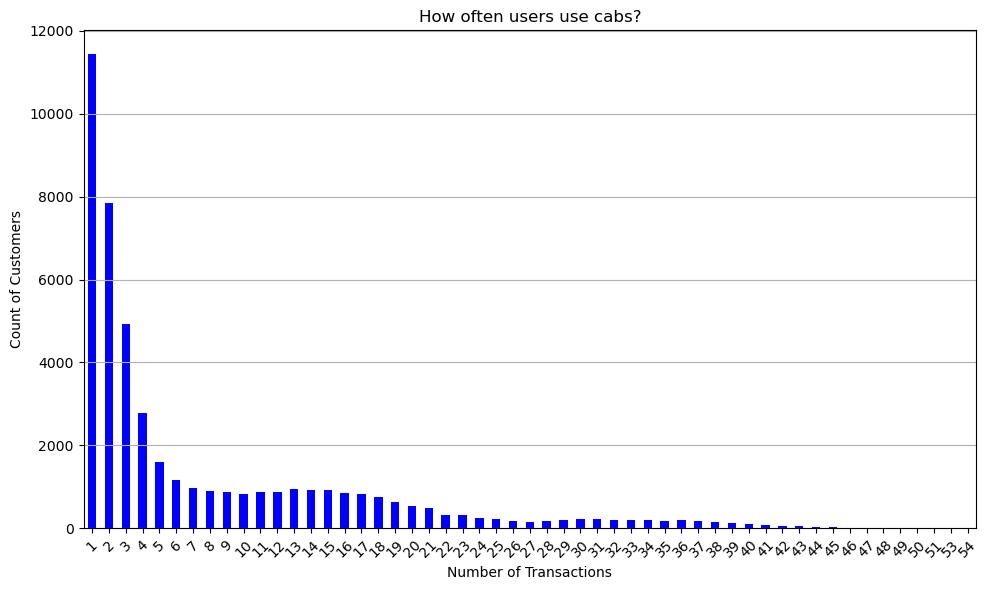

In [17]:
plt.figure(figsize=(10, 6))
transaction_count_by_customer.value_counts().sort_index().plot(kind='bar', color='blue')

plt.title('How often users use cabs?')
plt.xlabel('Number of Transactions')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45) 
plt.grid(axis='y') 

plt.tight_layout() 
plt.show()


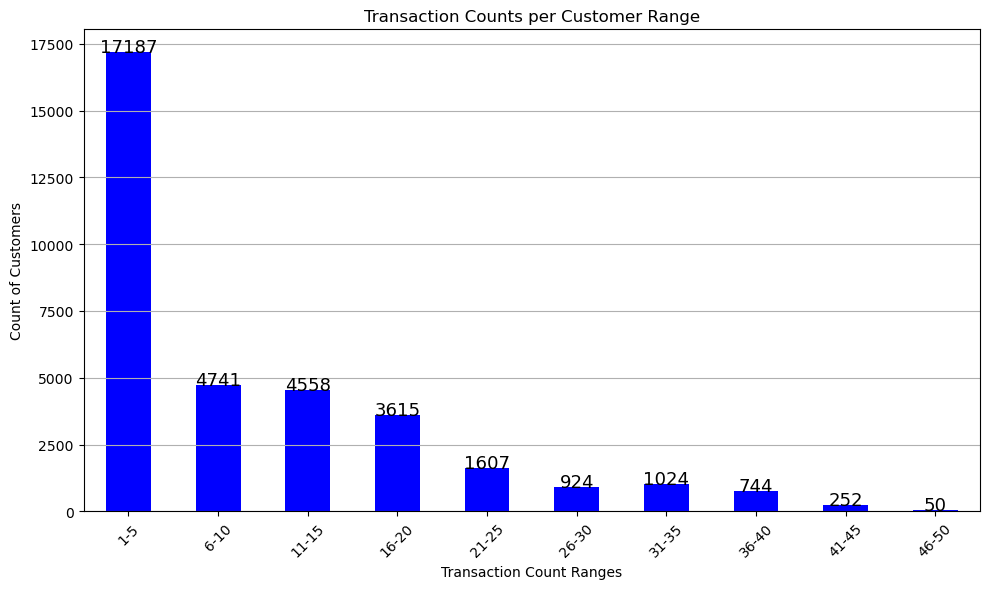

In [18]:
# Define the bin edges and labels for ranges
bin_edges = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50] 
bin_labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']  

# Cut the transaction counts into bins using pd.cut()
bins = pd.cut(transaction_count_by_customer, bins=bin_edges, labels=bin_labels)

# Count the occurrences in each bin
bin_counts = bins.value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='blue')

plt.title('Transaction Counts per Customer Range')
plt.xlabel('Transaction Count Ranges')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')

for i, count in enumerate(bin_counts):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=13)
plt.tight_layout()
plt.show()


Most customers order the cab from 1 to 5 times


In [19]:
# Transaction Count Analysis - Calculate the total number of transaction made by each customer, and which city
transaction_count_by_customer_city = merged_all_data.groupby(['Customer_ID', 'City']).size().reset_index(name='Transaction_Count')
transaction_count_by_customer_city = transaction_count_by_customer_city.sort_values('Transaction_Count', ascending=False)


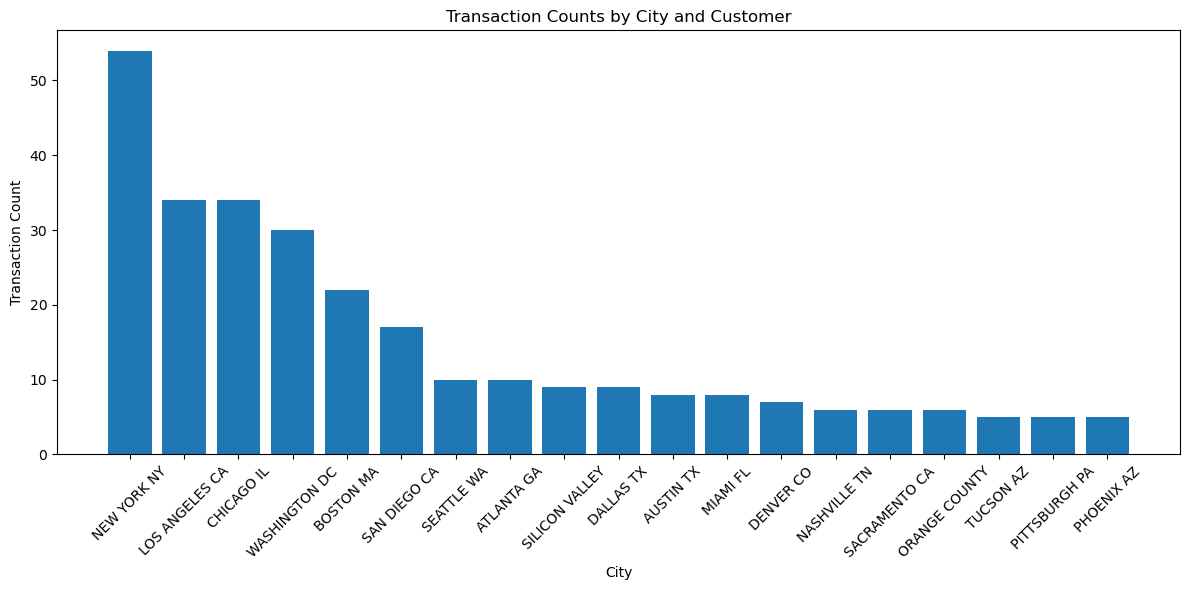

In [20]:
plt.figure(figsize=(12, 6))
plt.bar(transaction_count_by_customer_city['City'], transaction_count_by_customer_city['Transaction_Count'])
plt.xlabel('City')
plt.ylabel('Transaction Count')
plt.title('Transaction Counts by City and Customer')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Many customers who live in New York use the cab service, which makes sense as New York is a big city.

In [21]:
merged_all_data_income = merged_all_data.groupby('City')['Transaction_ID'].count().sort_values(ascending=False)

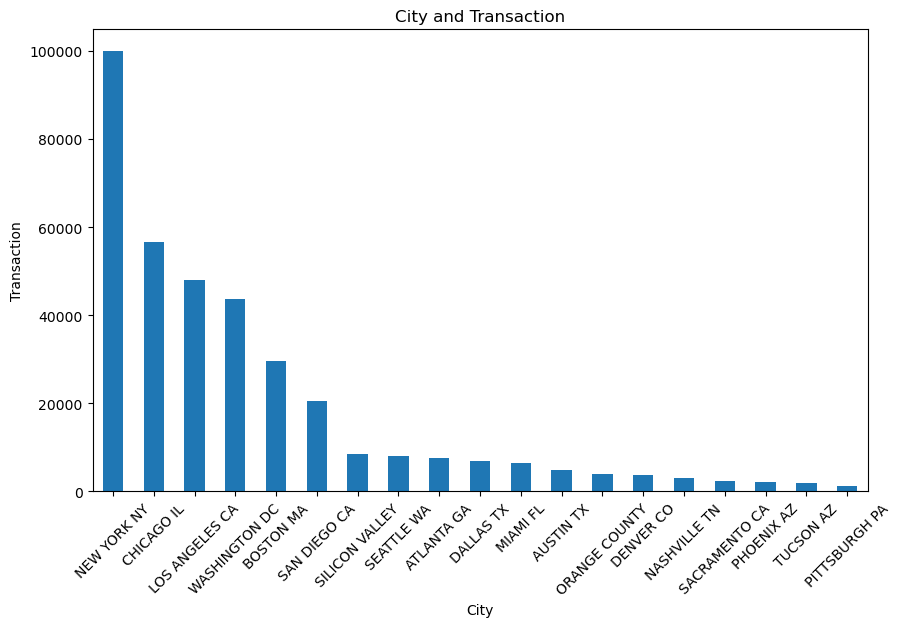

In [23]:
merged_all_data_income.plot(kind='bar', figsize=(10, 6))
plt.title('City and Transaction')
plt.xlabel('City')
plt.ylabel('Transaction')
plt.xticks(rotation=45) 
plt.show()

The highest number of transactions occurs in New York. This analysis closely aligns with the customer distribution, as most transactions take place in New York

Hour_of_Day      0
Day_of_Week       
Friday       81402
Monday       29737
Saturday     78234
Sunday       70310
Thursday     39747
Tuesday      29860
Wednesday    30102


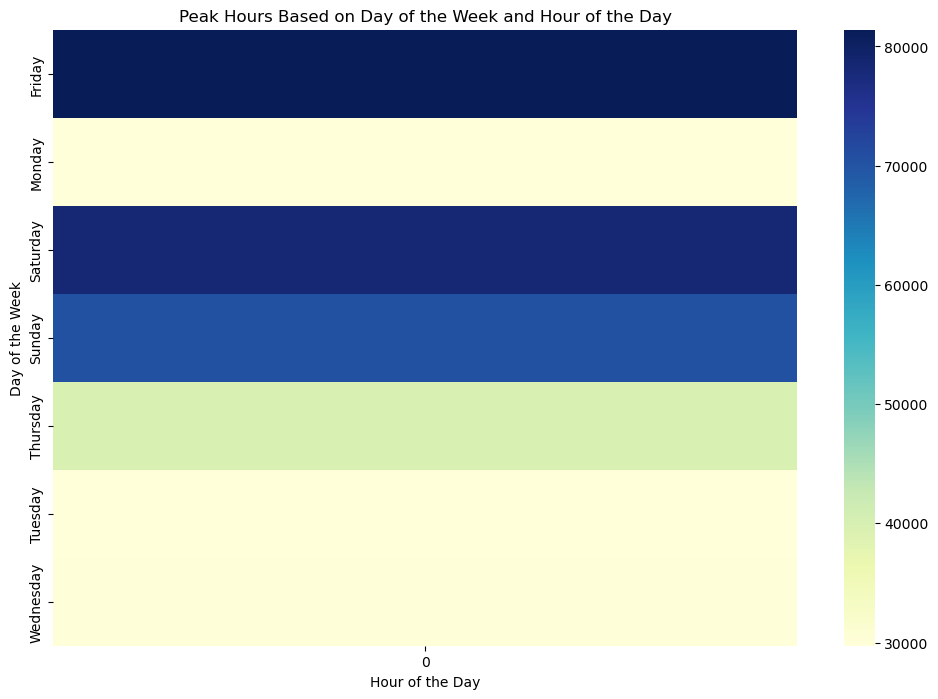

In [24]:
# Identifying Peak Hours or Days:
# Assuming 'Date_of_Travel' is already in datetime format
merged_all_data['Date_of_Travel'] = pd.to_datetime(merged_all_data['Date_of_Travel'])

# Extracting day of the week and hour of the day from the 'Date_of_Travel' column
merged_all_data['Day_of_Week'] = merged_all_data['Date_of_Travel'].dt.day_name()
merged_all_data['Hour_of_Day'] = merged_all_data['Date_of_Travel'].dt.hour

# Grouping by day of the week and hour of the day to count transactions
peak_hours = merged_all_data.groupby(['Day_of_Week', 'Hour_of_Day']).size().unstack()
peak_hours

# Sorting columns by the sum of transactions (from least busy to busiest hours)
peak_hours = peak_hours[peak_hours.sum().sort_values(ascending=False).index]
print(peak_hours)
# Visualizing peak hours in a heatmap
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(peak_hours, cmap='YlGnBu')
plt.title('Peak Hours Based on Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

Friday is the busiest day, followed by Saturday and Sunday. During this period, people use cabs the most


In [25]:
# Market Share: What is each company's market share based on customer transactions or usage?
# Calculate total transaction
total_transactions = merged_all_data['Transaction_ID'].nunique() 
total_transactions

359392

In [26]:
# Calculate the number of transactions or customers for each company
transactions_by_company = merged_all_data.groupby('Company')['Transaction_ID'].nunique()
transactions_by_company

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction_ID, dtype: int64

In [27]:
# Calculate the market share for each company based on transactions or customers.
market_share = (transactions_by_company / total_transactions) * 100
market_share

Company
Pink Cab      23.570642
Yellow Cab    76.429358
Name: Transaction_ID, dtype: float64

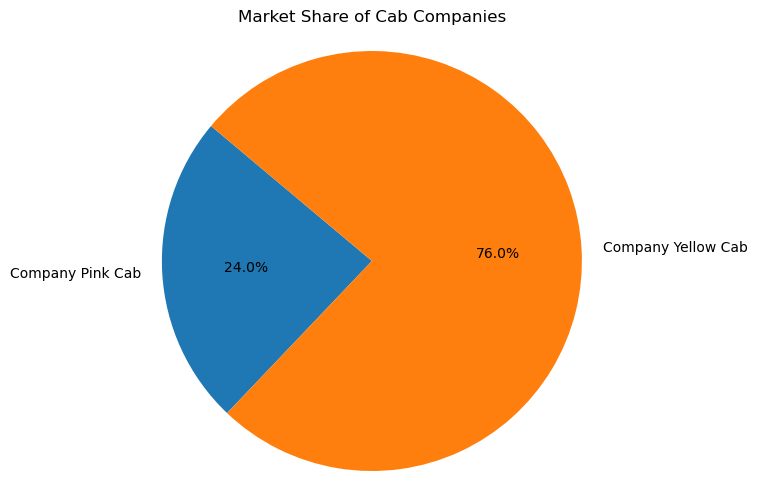

In [28]:
market_share = [24, 76] 

# Companies' labels for the pie chart
company_labels = ['Company Pink Cab', 'Company Yellow Cab'] 

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(market_share, labels=company_labels, autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Cab Companies')
plt.axis('equal') 
plt.show()

Based on the transactions and customer, the yellow cab has a market share of 76%, whereas the pink cab only holds 26%. This demonstrates the dominance of the yellow cab in the cab industry.

In [29]:
# Customer Behavior and Satisfaction:
# Customer Retention: Which company retains more customers over time?
# Calculate returning customers for each company
returning_customers = merged_all_data.groupby(['Company', 'Customer_ID'])['Transaction_ID'].nunique()
returning_customers = returning_customers[returning_customers > 1].reset_index()


In [30]:
# Count the number of returning customers for each company
returning_customers_count = returning_customers.groupby('Company')['Customer_ID'].nunique()
returning_customers_count

Company
Pink Cab      17996
Yellow Cab    27865
Name: Customer_ID, dtype: int64

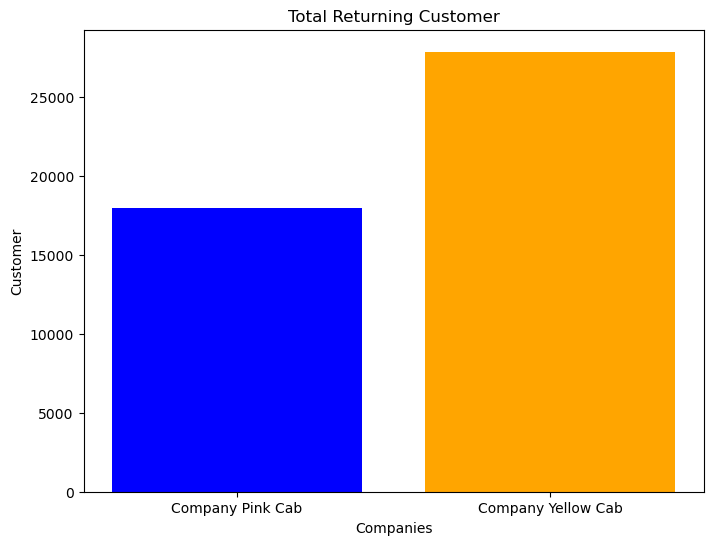

In [31]:
companies = ['Company Pink Cab', 'Company Yellow Cab']
# Plotting the total customer between 2 companies
plt.figure(figsize=(8, 6))
plt.bar(companies, returning_customers_count, color=['blue', 'orange'])
plt.xlabel('Companies')
plt.ylabel('Customer')
plt.title('Total Returning Customer')
plt.show()

As depicted in the bar chart, it's evident that customers tend to return more frequently using the yellow cab rather than the pink cab

In [32]:
# Calculate the total customers for each company
total_customers = merged_all_data.groupby('Company')['Customer_ID'].nunique()
total_customers

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer_ID, dtype: int64

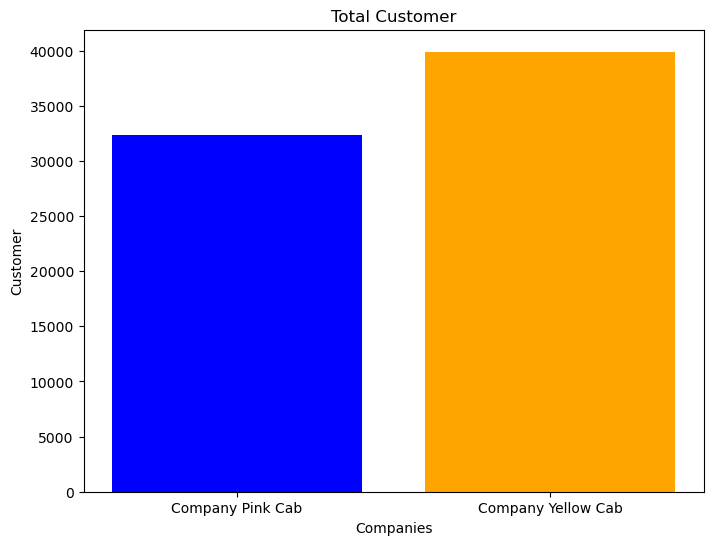

In [33]:
companies = ['Company Pink Cab', 'Company Yellow Cab']
# Plotting the total customer between 2 companies
plt.figure(figsize=(8, 6))
plt.bar(companies, total_customers, color=['blue', 'orange'])
plt.xlabel('Companies')
plt.ylabel('Customer')
plt.title('Total Customer')
plt.show()

While there's not a significant difference, yellow cabs have more customers than pink cabs

In [34]:
# Calculate the returning customer rate for each company
retention_rate = (returning_customers_count / total_customers) * 100
retention_rate

Company
Pink Cab      55.663470
Yellow Cab    69.844095
Name: Customer_ID, dtype: float64

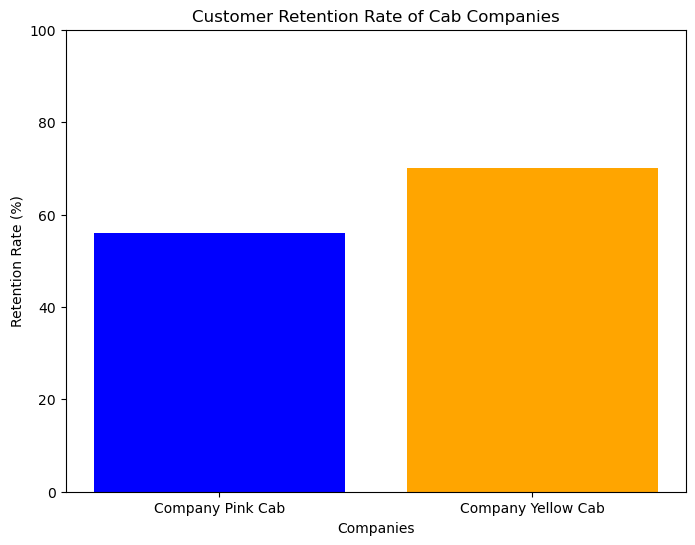

In [36]:
companies = ['Company Pink Cab', 'Company Yellow Cab']
retention_rates = [56, 70] 

# Plotting the retention rates
plt.figure(figsize=(8, 6))
plt.bar(companies, retention_rates, color=['blue', 'orange'])
plt.xlabel('Companies')
plt.ylabel('Retention Rate (%)')
plt.title('Customer Retention Rate of Cab Companies')
plt.ylim(0, 100)  
plt.show()

Yellow Cab has a higher rate of retaining customers compared to Pink Cab.

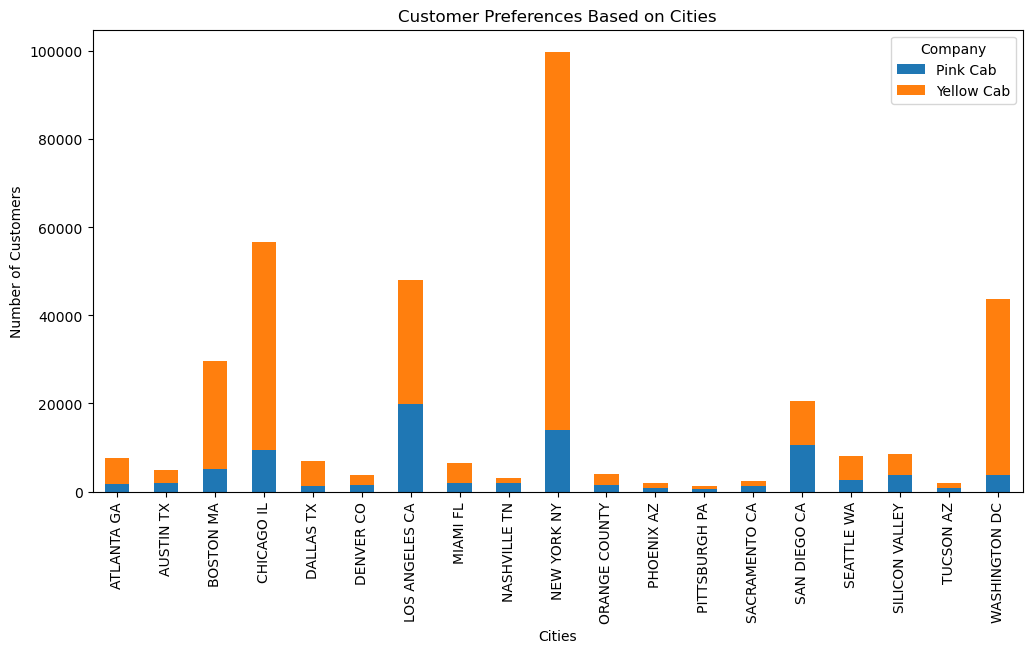

In [37]:
# Grouping by city and company to analyze preferences based on cities
customer_preferences_city = merged_all_data.groupby(['City', 'Company'])['Customer_ID'].count().unstack()
customer_preferences_city 
# Plotting preferences based on cities
customer_preferences_city.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Cities')
plt.ylabel('Number of Customers')
plt.title('Customer Preferences Based on Cities')
plt.legend(title='Company')
plt.show()

New York remains the city with the highest cab usage, followed by Chicago and Los Angeles. While more people use the pink cab in Nashville, in other cities, the majority tends to favor the yellow cab

In [38]:
# Strategy and Market Position:
# Pricing Strategy: Compare pricing structures between the two companies. Does one company have more competitive pricing?
average_price = merged_all_data.groupby('Company')['Price_Charged'].mean()
average_cost = merged_all_data.groupby('Company')['Cost_of_Trip'].mean()
profit_margin = ((merged_all_data['Price_Charged'] - merged_all_data['Cost_of_Trip']) / merged_all_data['Price_Charged']) * 100

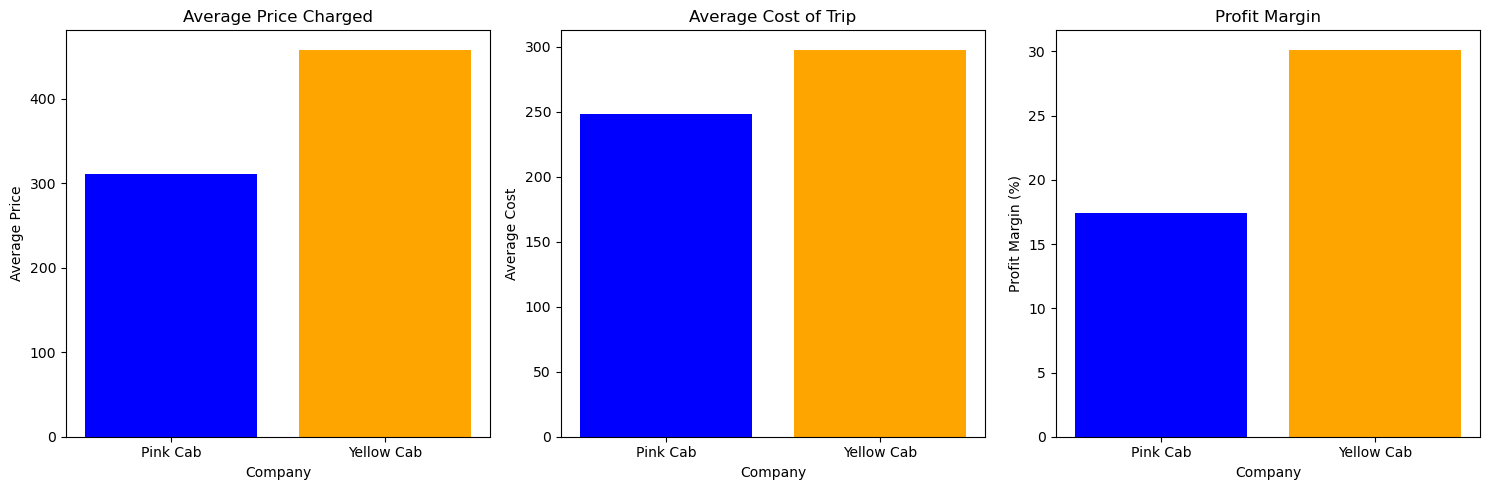

In [39]:
# Plotting bar charts for average price charged, cost, and profit margin
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colors = ['blue', 'orange']
# Average Price Charged
axes[0].bar(average_price.index, average_price.values, color = colors)
axes[0].set_title('Average Price Charged')
axes[0].set_xlabel('Company')
axes[0].set_ylabel('Average Price')

# Average Cost of Trip
axes[1].bar(average_cost.index, average_cost.values, color = colors)
axes[1].set_title('Average Cost of Trip')
axes[1].set_xlabel('Company')
axes[1].set_ylabel('Average Cost')

# Profit Margin
axes[2].bar(profit_margin.groupby(merged_all_data['Company']).mean().index, profit_margin.groupby(merged_all_data['Company']).mean().values , color = colors)
axes[2].set_title('Profit Margin')
axes[2].set_xlabel('Company')
axes[2].set_ylabel('Profit Margin (%)')

plt.tight_layout()
plt.show()

Yellow cabs have higher prices and trip costs compared to pink cabs. Despite the increased expenses, yellow cabs still maintain a higher profit margin than pink cabs

In [40]:
merged_all_data['Margin'] = merged_all_data['Price_Charged'] - merged_all_data['Cost_of_Trip']
merged_all_data['Margin'].sort_values

<bound method Series.sort_values of 0          57.3150
1         281.2772
2         194.6480
3          23.6660
4         253.9808
            ...   
359387    143.6180
359388     23.0464
359389     -5.8540
359390     -6.0900
359391     25.7948
Name: Margin, Length: 359392, dtype: float64>

In [41]:
margin_by_company = merged_all_data.groupby('Company')['Margin'].sum()
margin_by_company

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Margin, dtype: float64

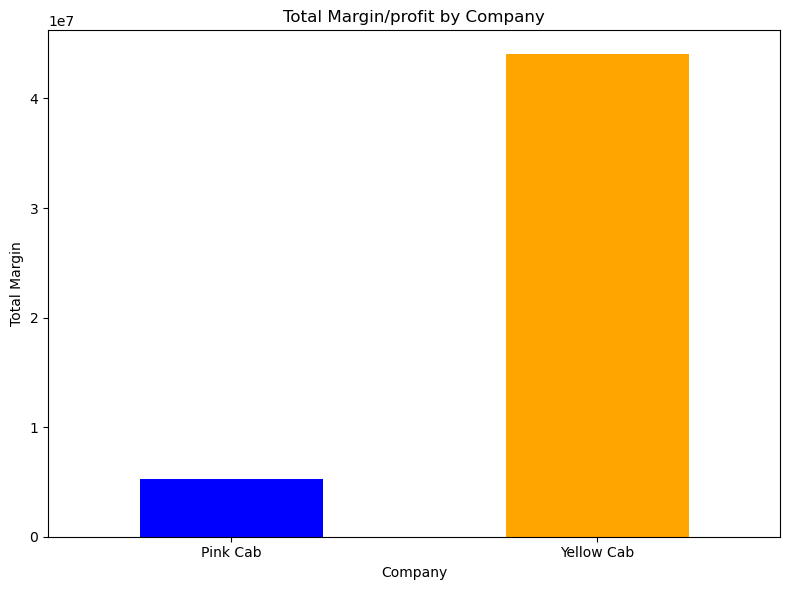

In [42]:
plt.figure(figsize=(8, 6))
margin_by_company.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Company')
plt.ylabel('Total Margin')
plt.title('Total Margin/profit by Company')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

As we can see, the total profit margin for yellow cabs is four times higher than that of pink cabs.

<Figure size 1000x600 with 0 Axes>

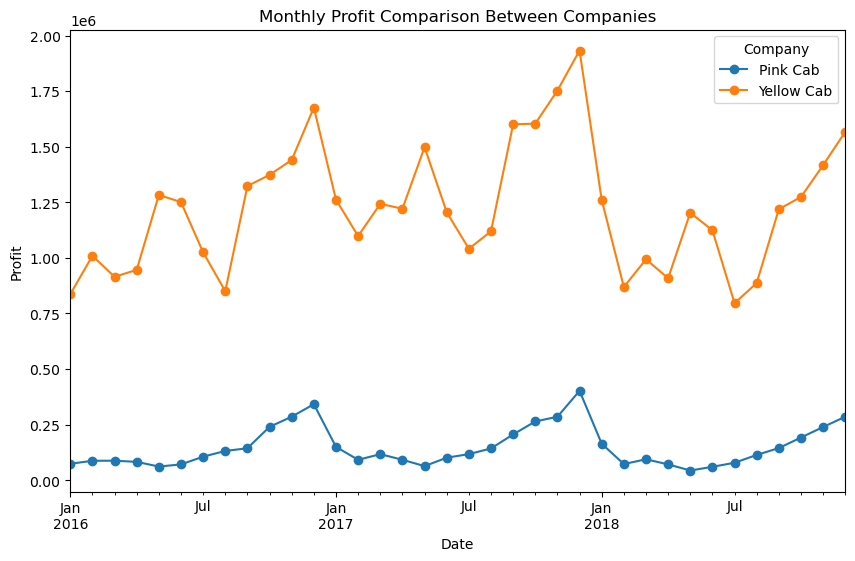

In [43]:
# Monthly
merged_all_data['Date_of_Travel'] = pd.to_datetime(merged_all_data['Date_of_Travel'])
monthly_profit = merged_all_data.groupby([merged_all_data['Date_of_Travel'].dt.to_period('M'), 'Company'])['Margin'].sum().unstack()

# Plotting monthly profit for both companies
plt.figure(figsize=(10, 6))
monthly_profit.plot(marker='o', linestyle='-', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Monthly Profit Comparison Between Companies')
plt.legend(title='Company')
plt.show()

In terms of monthly profit, yellow cabs consistently earn a higher profit margin than pink cabs. Both companies experience a surge in profits in December, likely attributed to the Christmas season, marking the peak earnings for both

<Figure size 1000x600 with 0 Axes>

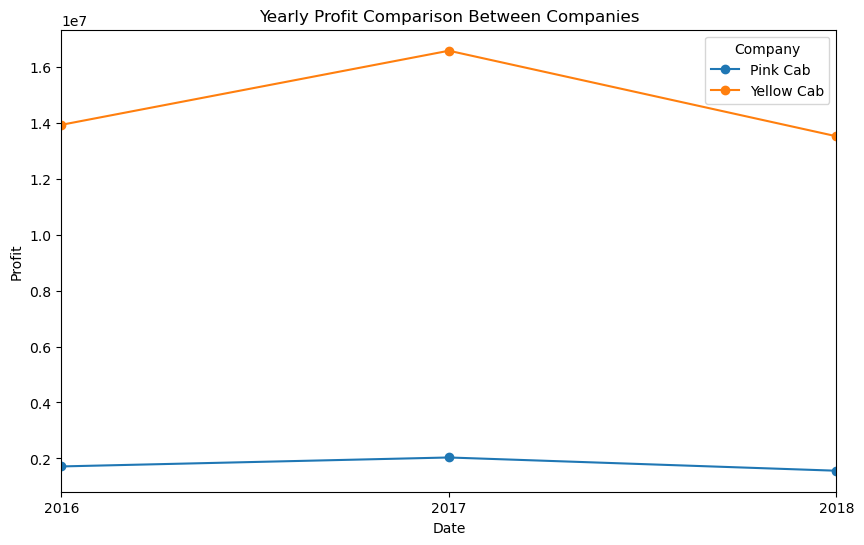

In [44]:
# Yearly profit
yearly_profit = merged_all_data.groupby([merged_all_data['Date_of_Travel'].dt.to_period('Y'), 'Company'])['Margin'].sum().unstack()

# Plotting monthly profit for both companies
plt.figure(figsize=(10, 6))
yearly_profit.plot(marker='o', linestyle='-', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Yearly Profit Comparison Between Companies')
plt.legend(title='Company')
plt.show()

Yellow cabs make more money each year because they earn more every month. The difference in yearly profits shows that yellow cabs make a lot more money than pink cabs.

In [45]:
# Revenue comparison : Which company has higher total revenue or earnings from cab services?
revenue_by_company = merged_all_data.groupby('Company')['Price_Charged'].sum()
revenue_by_company

Company
Pink Cab      2.632825e+07
Yellow Cab    1.258539e+08
Name: Price_Charged, dtype: float64

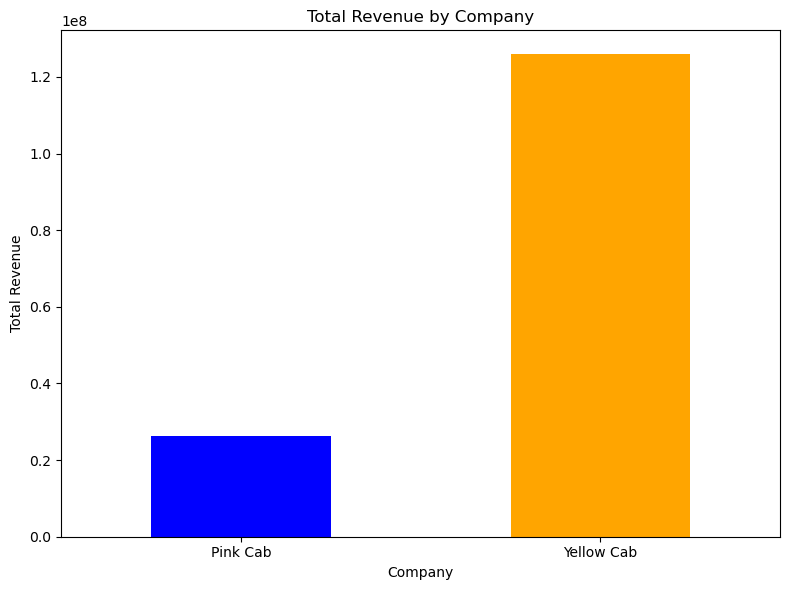

In [46]:
plt.figure(figsize=(8, 6))
revenue_by_company.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Company')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Company')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Yellow cabs charge higher prices, which is why they make a lot more money in revenue compared to pink cabs

In [47]:
payment_modes = merged_all_data.groupby(['Company', 'Payment_Mode'])['Transaction_ID'].count().unstack()

# Display counts of payment modes for both companies
print(payment_modes)

Payment_Mode    Card    Cash
Company                     
Pink Cab       50719   33992
Yellow Cab    164785  109896


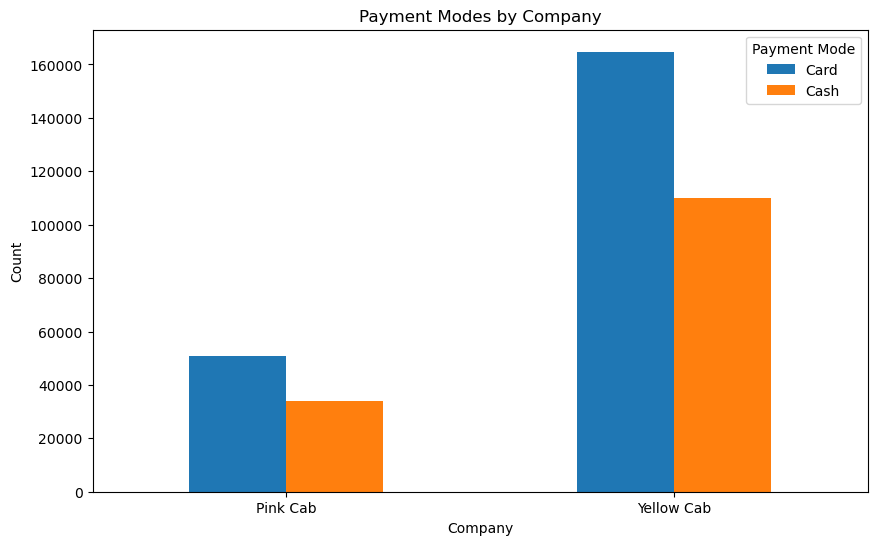

In [48]:
payment_modes.plot(kind='bar', figsize=(10, 6))
plt.title('Payment Modes by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.legend(title='Payment Mode')
plt.show()

More customers prefer using cards, but there are still many who use cash, especially with pink cabs.

In [49]:
selected_columns = ['Income_(USD/Month)', 'KM_Travelled', 'Price_Charged', 'Cost_of_Trip','Age','Population', 'Users','Transaction_ID', 'Customer_ID', 'Margin']

# Compute the correlation matrix
correlation_matrix = merged_all_data[selected_columns].corr()


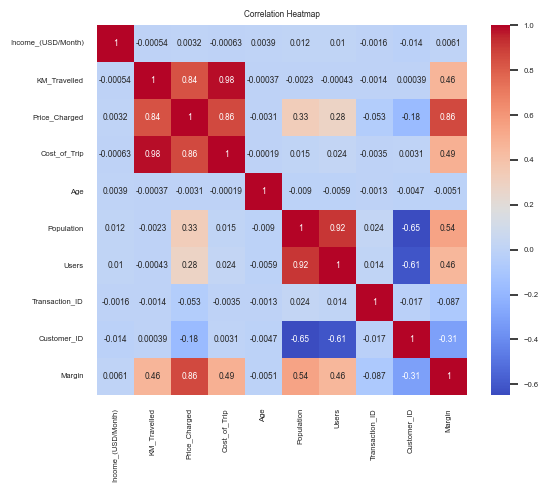

In [51]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
sns.set(font_scale=0.5) 
plt.title('Correlation Heatmap')
plt.show()

In [52]:
correlation_matrix

,Income_(USD/Month),KM_Travelled,Price_Charged,Cost_of_Trip,Age,Population,Users,Transaction_ID,Customer_ID,Margin
Income_(USD/Month),1.000000,-0.000544,0.003228,-0.000633,0.003907,0.011868,0.010464,-0.001570,-0.013608,0.006148
KM_Travelled,-0.000544,1.000000,0.835753,0.981848,-0.000369,-0.002311,-0.000428,-0.001429,0.000389,0.462768
Price_Charged,0.003228,0.835753,1.000000,0.859812,-0.003084,0.326589,0.281061,-0.052902,-0.177324,0.864154
Cost_of_Trip,-0.000633,0.981848,0.859812,1.000000,-0.000189,0.015108,0.023628,-0.003462,0.003077,0.486056
Age,0.003907,-0.000369,-0.003084,-0.000189,1.000000,-0.009002,-0.005906,-0.001267,-0.004735,-0.005093
Population,0.011868,-0.002311,0.326589,0.015108,-0.009002,1.000000,0.915490,0.023868,-0.647052,0.544079
Users,0.010464,-0.000428,0.281061,0.023628,-0.005906,0.915490,1.000000,0.013526,-0.610742,0.457758
Transaction_ID,-0.001570,-0.001429,-0.052902,-0.003462,-0.001267,0.023868,0.013526,1.000000,-0.016912,-0.087130
Customer_ID,-0.013608,0.000389,-0.177324,0.003077,-0.004735,-0.647052,-0.610742,-0.016912,1.000000,-0.306527
Margin,0.006148,0.462768,0.864154,0.486056,-0.005093,0.544079,0.457758,-0.087130,-0.306527,1.000000


Summary from the chart 
- The chart shows a correlation between the price charged and various factors like profit margin, trip cost, and distance traveled. This connection might suggest how pricing influences factors such as profit margins, trip expenses, and the distance covered.
- Population size can influence the number of cab users in an area, but it's not determining factor. The city's infrastructure, available transportation options, and the lifestyle choices of residents all play crucial roles in determining how many people using cab services despite the population size. It's a combination of these factors that collectively impact cab usage patterns within a city or region

In [53]:
transactions_by_gender = merged_all_data.groupby(['Gender','Company'])['Users'].count().unstack()
transactions_by_gender

Company,Pink Cab,Yellow Cab
Gender,,
Female,37480,116000
Male,47231,158681


<Figure size 800x600 with 0 Axes>

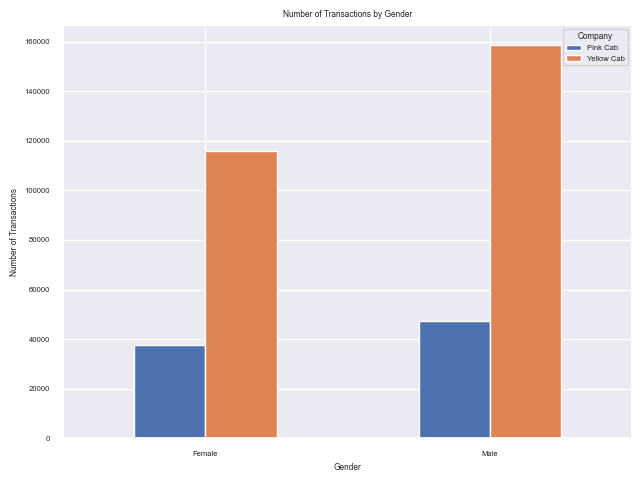

In [54]:
# Plotting a bar chart
plt.figure(figsize=(8, 6))
transactions_by_gender.plot(kind='bar')
plt.title('Number of Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Males tend to use more cabs than females

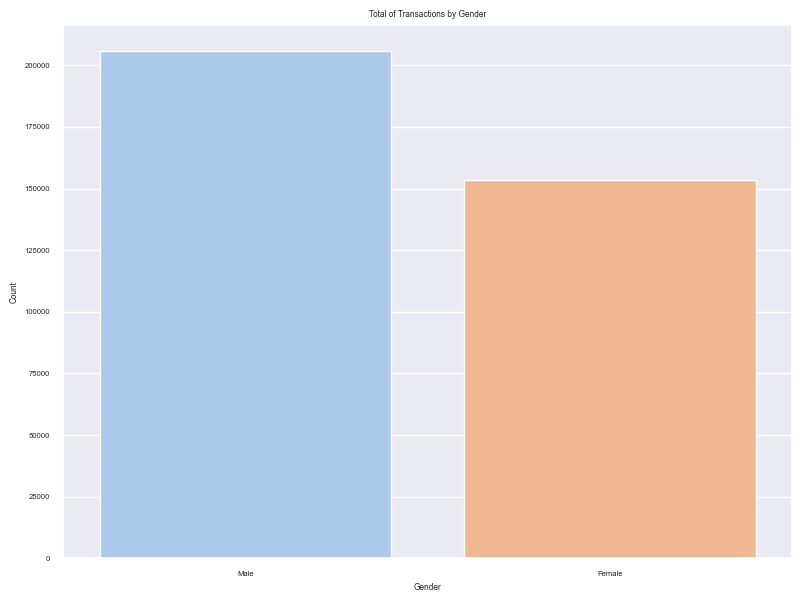

In [56]:
# Plotting a count plot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_all_data, x='Gender', palette='pastel')
plt.title('Total of Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


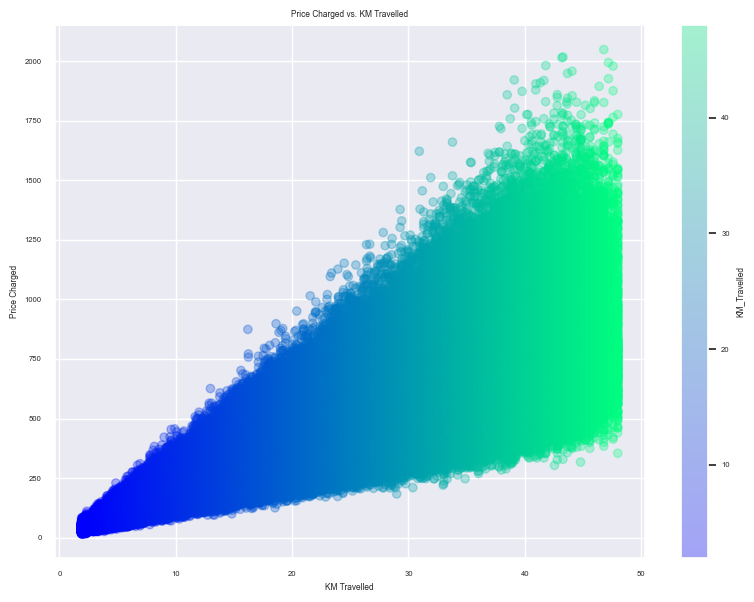

In [57]:
# Define a color variable based on another column
color_values = merged_all_data['KM_Travelled'] 

# Plotting a scatter plot with a color gradient
plt.figure(figsize=(8, 6))
plt.scatter(merged_all_data['KM_Travelled'], merged_all_data['Price_Charged'], c=color_values, cmap='winter', alpha=0.3)
plt.colorbar(label='KM_Travelled') 
plt.title('Price Charged vs. KM Travelled')
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged')
plt.grid(True)
plt.tight_layout()
plt.show()

The farther you travel in kilometers, the higher the price charged will be

In [58]:
merged_all_data_cust = merged_all_data.groupby('City')['Income_(USD/Month)'].sum().sort_values(ascending=False)


In [59]:
users_population = df_city['Users'] / df_city['Population'] * 100
users_population.index = df_city['City']

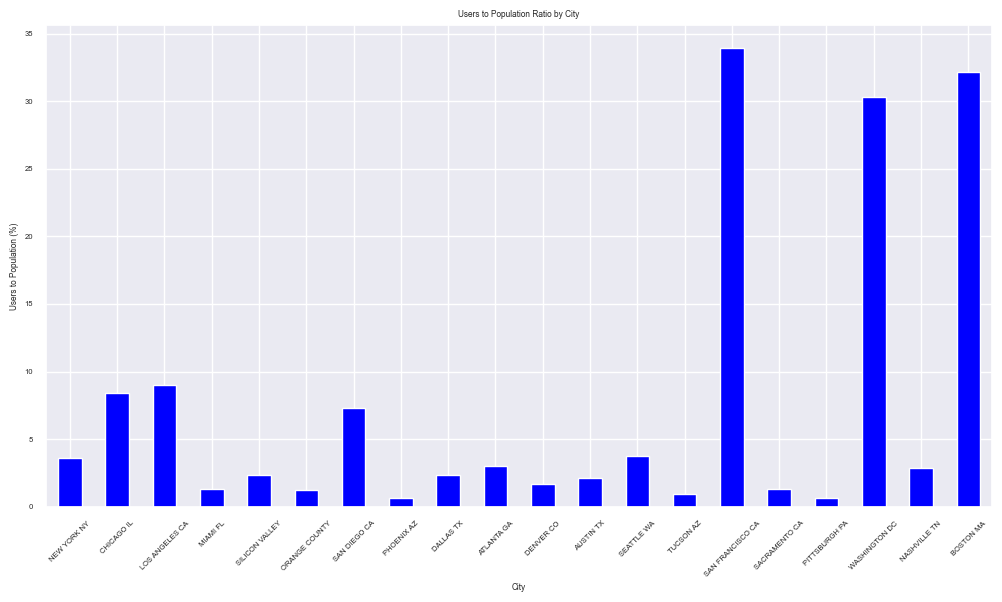

In [60]:
plt.figure(figsize=(10, 6))
users_population.plot(kind='bar', color='blue')
plt.title('Users to Population Ratio by City')
plt.xlabel('City')
plt.ylabel('Users to Population (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

San Francisco, Boston, and Washington have a higher ratio of cab users concerning their population size compared to New York, Chicago, and Los Angeles. However, even though the user ratio is lower in New York, the city still boasts the highest total number of customers when compared to the other cities, possibly due to its larger overall population. In essence, while the proportion of users to the population might be higher in certain cities, the absolute number of customers in New York remains the largest due to its sheer population size.

In [61]:
merged_all_data_income = merged_all_data.groupby('City')['Income_(USD/Month)'].mean()
merged_all_data_income =  merged_all_data_income.sort_values(ascending=False)

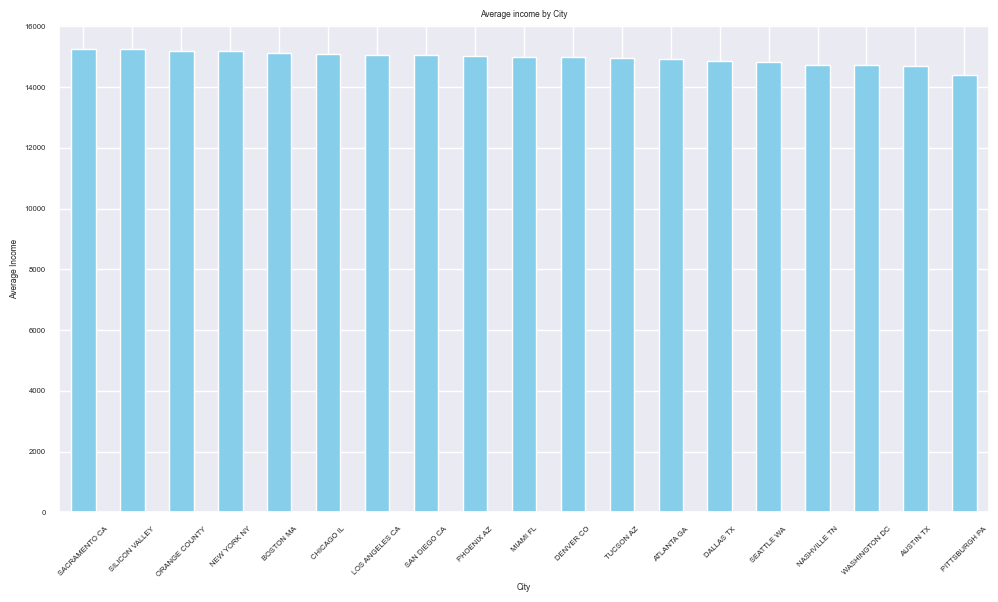

In [62]:
plt.figure(figsize=(10, 6))
merged_all_data_income.plot(kind='bar', color='skyblue')
plt.title('Average income by City')
plt.xlabel('City')
plt.ylabel('Average Income')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

The average income is quite similar in every city

In [63]:
merged_all_data_age = merged_all_data.groupby('Age')['Users'].count()

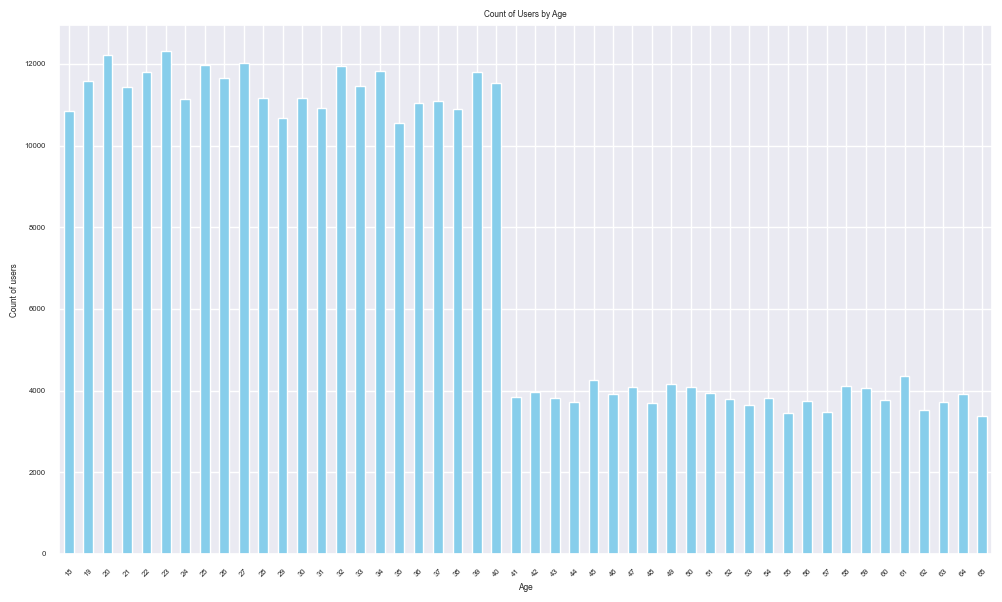

In [64]:
plt.figure(figsize=(10, 6))
merged_all_data_age.plot(kind='bar', color='skyblue')

plt.title('Count of Users by Age')
plt.xlabel('Age')
plt.ylabel('Count of users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


People under 40 tend to use cabs more than those over 40. Younger individuals might be more inclined towards a faster mode of transportation, have different commuting patterns due to work or lifestyle, or simply prefer the convenience offered by cab services. Additionally, factors like tech-savviness or familiarity with app-based ride services might also influence the higher usage among the younger demographic 

In [65]:
merged_all_data['Date_of_Travel'] = pd.to_datetime(merged_all_data['Date_of_Travel'])
merged_all_data['Season'] = merged_all_data['Date_of_Travel'].dt.month.map(
    {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
     7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
)

In [66]:
seasonal_usage = merged_all_data.groupby('Season')['Customer_ID'].count()
seasonal_usage = seasonal_usage.sort_values(ascending=False)

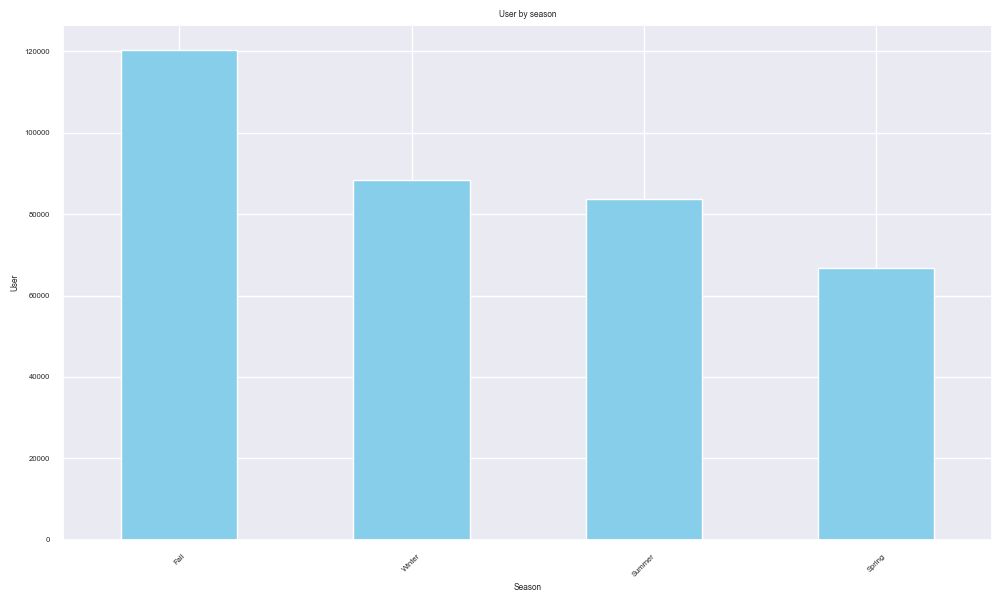

In [67]:
plt.figure(figsize=(10, 6))
seasonal_usage.plot(kind='bar', color='skyblue')

plt.title('User by season')
plt.xlabel('Season')
plt.ylabel('User')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It appears that fall is a more popular season for people using cabs. Possibly during the fall, there might be more events, festivities, or cultural activities happening, prompting increased travel and hence, a higher demand for cab services.

In [68]:
# Combining data with the US Holiday season
df_holiday = pd.read_csv('/Users/viedamayanti/Desktop/DataGlacierIntern/Week2/DataSets-main/US_Holiday_Dates_(2004-2021).csv')

In [69]:
merged_all_data = merged_all_data.rename(columns={'Date_of_Travel':'Date'})

In [70]:
df_holiday['Date'] = pd.to_datetime(df_holiday['Date'])

In [71]:
df_holiday.shape

(342, 6)

In [72]:
merged_holiday = merged_all_data.merge(df_holiday, on='Date')

In [73]:
merged_holiday.duplicated().sum()

0

In [74]:
merged_holiday['Holiday'].unique()

array(['Labor Day Weekend', 'Veterans Day', 'Martin Luther King, Jr. Day',
       'Memorial Day', 'New Year’s Eve', 'Western Easter',
       'Eastern Easter', '4th of July', 'Thanksgiving Eve',
       'Valentine’s Day', 'Labor Day', "Washington's Birthday",
       'Juneteenth', "New Year's Day", 'Christmas Eve', 'Christmas Day',
       'Thanksgiving Day', 'Columbus Day'], dtype=object)

In [75]:
holiday_count = merged_holiday.groupby('Holiday')['Transaction_ID'].count()
holiday_count = holiday_count.sort_values(ascending=False)


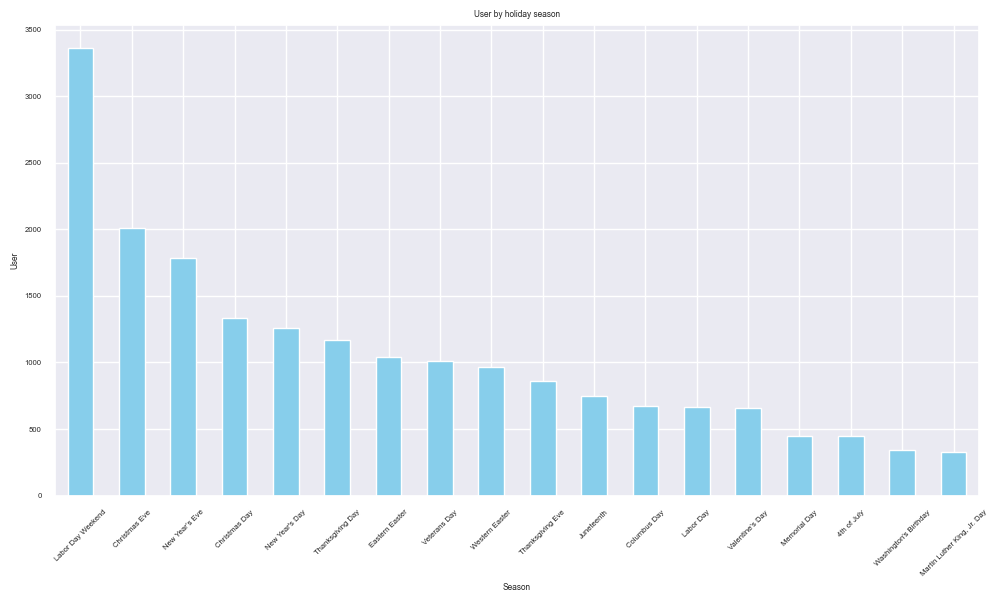

In [76]:
plt.figure(figsize=(10, 6))
holiday_count.plot(kind='bar', color='skyblue')

plt.title('User by holiday season')
plt.xlabel('Season')
plt.ylabel('User')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Labor Day marks the busiest holiday season for cab service users, followed by Christmas and New Year's. The monthly profit analysis also indicates a surge in profits starting from September, continuing to increase steadily until December

In [77]:
# Hypothesis
# Gender and transaction
from scipy.stats import chi2_contingency

# H0 = There are no significant association between gender and transaction count
# H1 = There are significant association between gender and transaction count

# Create a contingency table (gender vs. transaction count)
contingency_table = pd.crosstab(merged_all_data['Gender'], merged_all_data['Transaction_ID'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05

# Print results
if(p > alpha):
    print (f'P- value =  {p} We accept the null hypothesis as there are no significant association between gender and transaction count  ')
else:
    print ('We accept the alternativ hypothesis as there are significant association between gender and transaction count ')


P- value =  0.4992157406942037 We accept the null hypothesis as there are no significant association between gender and transaction count  


In [78]:
# Payment mode and Income
# H0 = There are no significant association between Payment mode and Income
# H1 = There are significant association between Payment mode and Income

# Create a contingency table (Payment mode vs. Income)
contingency_table = pd.crosstab(merged_all_data['Payment_Mode'], merged_all_data['Income_(USD/Month)'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
if(p > 0.05):
    print (f'P- value =  {p} We accept the null hypothesis as there are no significant association between Payment mode and Income ')
else:
    print (f'P- value =  {p}We accept the alternativ hypothesis as here are significant association between Payment mode and Income')

P- value =  0.8688438734257997 We accept the null hypothesis as there are no significant association between Payment mode and Income 


In [80]:
# Payment mode and age
# H0 = There are no significant association between payment mode and age
# H1 = There are significant association between payment mode and age

# Create a contingency table (Payment mode vs. age)
contingency_table = pd.crosstab(merged_all_data['Payment_Mode'], merged_all_data['Age'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
if(p > 0.05):
    print (f'P- value =  {p} We accept the null hypothesis as there are no significant association between payment mode and age')
else:
    print (f'P- value =  {p} We accept the alternativ hypothesis as there are a significant association between payment mode and age')

P- value =  0.05610251903391298 We accept the null hypothesis as there are no significant association between payment mode and age


If the p-value is less than or equal to 0.05, we reject the null hypothesis and accept the alternative hypothesis, indicating a significant association between payment mode and age. However, considering the p-value is slightly greater than 0.05, it may warrant further analysis to explore the relationship more comprehensively.

In [81]:
# Holiday and margin / profit
# H0 = There are no significant association between holiday and profit
# H1 = There are significant association between holiday and profit

# Create a contingency table (Payment mode vs. age)
contingency_table = pd.crosstab(merged_holiday['Holiday'], merged_all_data['Margin'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
# Print results
if(p > alpha):
    print (f'P- value =  {p} We accept the null hypothesis as there are no significant association between holiday and profit ')
else:
    print (f'P- value =  {p} We accept the alternativ hypothesis as here are asignificant association between holiday and profit')

P- value =  0.5325488662905628 We accept the null hypothesis as there are no significant association between holiday and profit 


In [82]:
# Check for outliers
numeric_columns = ['KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'Age', 'Income_(USD/Month)', 'Margin']

for column in numeric_columns:
    Q1 = merged_all_data[column].quantile(0.25)
    Q3 = merged_all_data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = merged_all_data[(merged_all_data[column] < lower_bound) | (merged_all_data[column] > upper_bound)]
  
if not outliers.empty:
    print(f"Outliers found in column '{column}':")
    print(outliers)
else:
    print(f"No outliers found in column '{column}'")
    


Outliers found in column 'Margin':
        Transaction_ID       Date     Company           City  KM_Travelled  \
24            10000384 2016-01-02  Yellow Cab     ATLANTA GA         33.93   
28            10000385 2016-01-09  Yellow Cab     ATLANTA GA         42.18   
38            10000387 2016-01-06  Yellow Cab     ATLANTA GA         26.75   
41            10000388 2016-01-07  Yellow Cab     ATLANTA GA         46.02   
46            10000390 2016-01-05  Yellow Cab     ATLANTA GA         36.30   
...                ...        ...         ...            ...           ...   
355311        10169185 2017-04-28  Yellow Cab  WASHINGTON DC         45.20   
356036        10173932 2017-05-07  Yellow Cab  WASHINGTON DC         35.10   
356798        10137832 2017-01-08  Yellow Cab  WASHINGTON DC         46.80   
359125        10178913 2017-05-26  Yellow Cab  WASHINGTON DC         42.80   
359239        10171493 2017-05-05  Yellow Cab  WASHINGTON DC         35.02   

        Price_Charged  Cost_

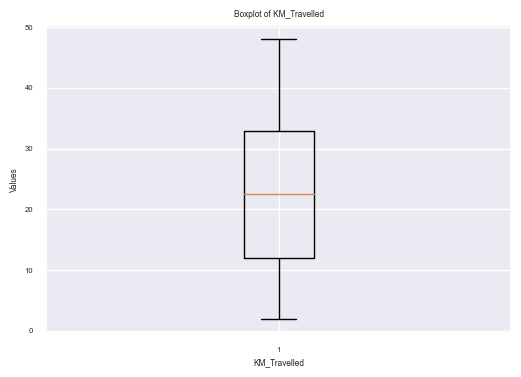

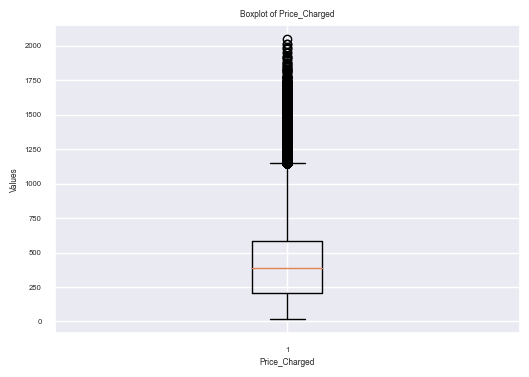

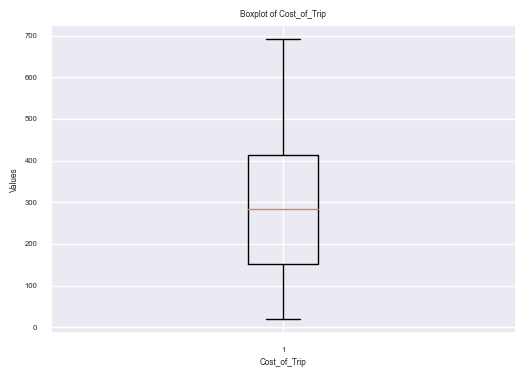

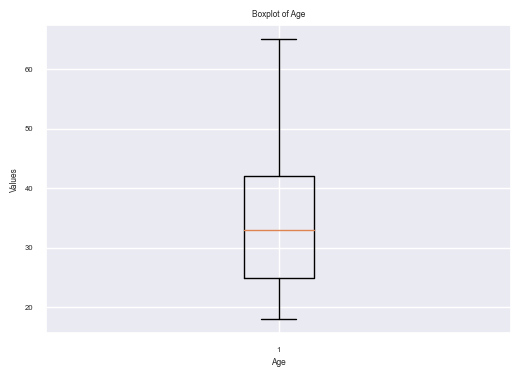

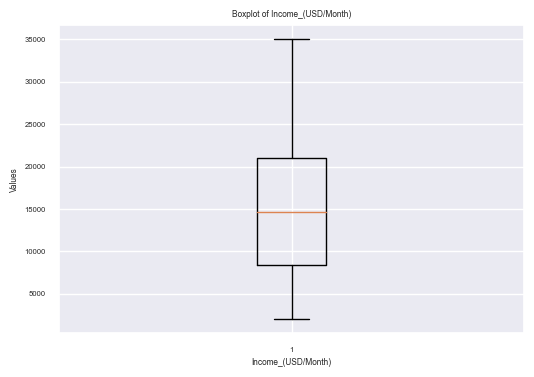

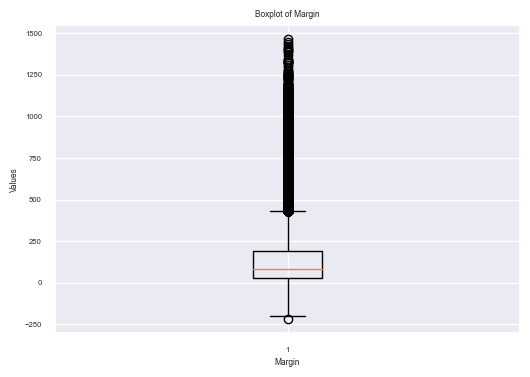

In [83]:
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(merged_all_data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

I have identified outliers in the 'Price_Charged' column, and these outliers are also affecting the 'Margin' profit column